In [1]:
from pyincore import InsecureIncoreClient, DataService, InventoryDataset
from pyincore import HazardService
from pyincore import PlotUtil
import json
import time
import geopandas as gpd
from matplotlib import cm
import pandas as pd
import numpy as np

In [2]:
client = InsecureIncoreClient("http://incore2-services.ncsa.illinois.edu:8888", "jonglee")

# Data Service Module 
A python module to communicate IN-CORE data service
- query/search dataset
- download dataset
- upload dataset

In [8]:
#Initialize data service
datasvc = DataService(client)

In [9]:
#Search dataset with title containing "essential"
datasvc.get_datasets(title="essential")

[{'id': '5a284f42c7d30d13bc0821ba',
  'deleted': False,
  'title': 'Shelby County Essential Facilities',
  'description': '',
  'date': '2017-12-06T14:12:50-0600',
  'creator': 'ergo',
  'contributors': [],
  'fileDescriptors': [{'id': '5a284f42c7d30d13bc0821bd',
    'deleted': False,
    'filename': 'shelby_county_ef.dbf',
    'mimeType': 'application/octet-stream',
    'size': 49029,
    'dataURL': 'file:/home/incore/data/5a/28/5a284f42c7d30d13bc0821bd/shelby_county_ef.dbf',
    'md5sum': 'a6a319c9e37ca66543202ee340b4d84d'},
   {'id': '5a284f42c7d30d13bc0821c0',
    'deleted': False,
    'filename': 'shelby_county_ef.fix',
    'mimeType': 'application/octet-stream',
    'size': 1897,
    'dataURL': 'file:/home/incore/data/5a/28/5a284f42c7d30d13bc0821c0/shelby_county_ef.fix',
    'md5sum': 'ece074b7ed9710f89434c6db1bc1fc6c'},
   {'id': '5a284f43c7d30d13bc0821c3',
    'deleted': False,
    'filename': 'shelby_county_ef.prj',
    'mimeType': 'application/octet-stream',
    'size': 220,


## Sample dataset: 5ade51daec2309045650c157 (Shelby county essential facility)

In [6]:
dataset_id = "5ade51daec2309045650c157"
ess_dataset = datasvc.get_dataset_metadata(dataset_id)
ess=datasvc.get_dataset_blob(ess_dataset['id'])

It already exsists; no unzip


In [7]:
buildings = InventoryDataset(ess)

In [7]:
gdf = gpd.GeoDataFrame.from_features(buildings.inventory_set)

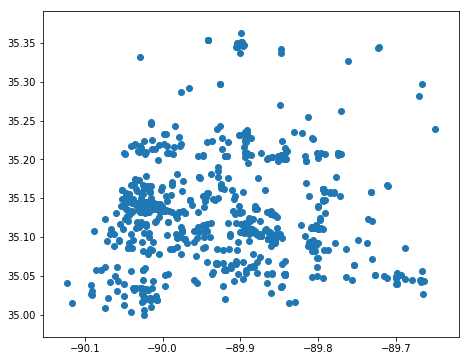

In [8]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6
gdf.plot()

In [9]:
gdf.head()

,IMPUTED,a_stories,appr_bldg,b_stories,bldg_id,broad_occ,bsmt_type,cont_val,dgn_lvl,dwell_unit,...,parid,parid_card,repl_cst,sq_foot,str_cst,str_prob,str_typ2,struct_typ,tract_id,year_built
0,F,1,1015500,0,088012 00133C_1_1,Office Commercial,NONE,3492254,Moderate - Code,0,...,088012 00133C,088012 00133C_1,2328169,19592,395789,1.00000,S1L,S1,47157020621,1997
1,T,2,3375000,0,071025 00085_SCH534,Education,NONE,8860365,Low - Code,0,...,071025 00085,071025 00085_SCH534,8860365,75000,2197371,0.46050,C1L,C1,47157010000,1965
2,F,2,171300,0,017022 00015_1_1,Office Commercial,NONE,1008905,Low - Code,1,...,017022 00015,017022 00015_1,672604,4388,98200,0.35000,W1,W1,47157003600,1900
3,T,2,3375000,0,044042 00008C_SCH576,Education,NONE,8860365,Low - Code,0,...,044042 00008C,044042 00008C_SCH576,8860365,75000,2197371,0.46050,C1L,C1,47157003000,1965
4,T,1,804000,2,075150 00025_1_1,Education,SLAB,2435338,Low - Code,0,...,075150 00025,075150 00025_1,2435338,20100,603964,0.41281,C1L,C1,47157022330,1965


In [10]:
a = gdf['broad_occ'].value_counts()
a

Office Commercial    406
Education            295
Health Care           22
Name: broad_occ, dtype: int64

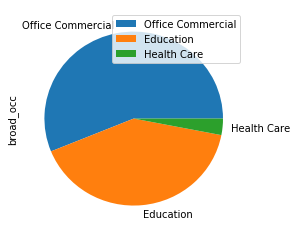

In [11]:
a.plot.pie(figsize=(4,4), legend=True)

In [12]:
a = gdf['str_typ2'].value_counts()
a

C1L     348
S1L     121
W1       91
W2       70
URML     41
C2M      11
RM1L     10
S1M      10
C2H       6
PC1       6
S1H       4
S3        3
C1M       2
Name: str_typ2, dtype: int64

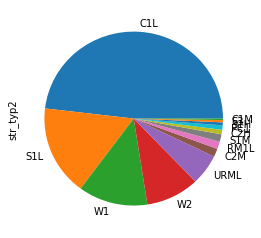

In [13]:
a.plot.pie(figsize=(4,4))

In [14]:
PlotUtil.get_geopandas_map(gdf)

In [15]:
layers = [{'id': dataset_id,'name': 'Essential Facilities', 'style':''}]
PlotUtil.get_wms_map(layers)

In [16]:
hazardsvc = HazardService(client)

In [ ]:
eq_config = {
  "attenuations": {
    "AtkinsonBoore1995": "1.0"
  },
  "eqParameters": {
    "srcLatitude": "35.927",
    "srcLongitude": "-89.919",
    "magnitude": "7.9",
    "depth": "10.0"
  },
  "visualizationParameters": {
    "demandType": "PGA",
    "demandUnits": "g",
    "minX": "-90.3099",
    "minY": "34.9942",
    "maxX": "-89.6231",
    "maxY": "35.4129",
    "numPoints": "1025",
    "amplifyHazard": "true"
  }
}
eq = hazardsvc.create_earthquake(json.dumps(eq_config))

In [17]:
# this is code to avoid create new earthquake over and over
eq = {'id': '5adf87dcec230904566c5dd7',
 'attenuations': {'AtkinsonBoore1995': 1.0},
 'eqParameters': {'srcLatitude': 35.927,
  'srcLongitude': -89.919,
  'magnitude': 7.9,
  'coseismicRuptureDepth': 0.0,
  'dipAngle': 0.0,
  'azimuthAngle': 0.0,
  'rakeAngle': 0.0,
  'seismogenicDepth': 0.0,
  'depth': 10.0,
  'depth2p5KmPerSecShearWaveVelocity': 2.0,
  'shearWaveDepth1p0': 0.0,
  'faultTypeMap': {},
  'region': 'Global'},
 'visualizationParameters': {'demandType': 'PGA',
  'demandUnits': 'g',
  'minX': -90.3099,
  'minY': 34.9942,
  'maxX': -89.6231,
  'maxY': 35.4129,
  'numPoints': 1025,
  'amplifyHazard': True},
 'siteClassDataset': None,
 'privileges': {'userPrivileges': {'jonglee': 'ADMIN'}, 'groupPrivileges': {}},
 'defaultSiteClass': 'D',
 'siteAmplification': 'NEHRP',
 'rasterDatasetId': '5adf87dcec23090456550ed5'}

In [18]:
layers = [
    {'id': eq['rasterDatasetId'],'name': 'earthquake', 'style':'earthquake-pga-g'},
    {'id': dataset_id,'name': 'Essential Facilities', 'style':''}
]
PlotUtil.get_wms_map(layers)

In [19]:
damage_ratio_id = "5a284f2ec7d30d13bc08209a"
dmg_ratio = datasvc.get_dataset_blob(damage_ratio_id)

It already exsists; no unzip


In [20]:
# need to have pandas data model
#import pandas as pd
dmg_ratio
#dmg_ratio_df = pd.read_csv(dmg_ratio)

'cache_data\\Building_Damage_Ratios_v1.1'

In [21]:
#dmg_ratio_df

In [22]:
from pyincore.analyses.buildingdamage import BuildingDamage

In [23]:
mapping_id = "5aa9858d949f232724db46bd"
bldgDmg = BuildingDamage(client, "earthquake/"+eq['id'], dmg_ratio)

In [90]:
start = time.time()
output = bldgDmg.get_damage(buildings.inventory_set, mapping_id, 2, None, 2)
end = time.time()
print(str(end - start)+ " sec")

11.334462881088257 sec


In [24]:
start = time.time()
output = bldgDmg.get_damage(buildings.inventory_set, mapping_id, 2, None, 8)
end = time.time()
print(str(end - start)+ " sec")

12.72514295578003 sec


In [25]:
#pandas analysis
output

'dmg-results.csv'

In [26]:
tornado_config = {
    "tornadoModel" : "MeanWidthTornado",
    "tornadoParameters" : { 
        "efRating" : "EF5",
        "startLatitude" : "35.092",
        "startLongitude" : "-90.091",
        "randomSeed" : "1234",
        "endLatitude" : [35.268],
        "endLongitude" : [-89.758],
        "windSpeedMethod" : "1" 
    }
}

In [45]:
tornado=hazardsvc.create_tornado_scenario(json.dumps(tornado_config))

In [27]:
tornado = {'id': '5ae35654ec23092179385e61',
 'tornadoModel': 'MeanWidthTornado',
 'numSimulations': 1,
 'tornadoParameters': {'efRating': 'EF5',
  'maxWindSpeed': 250.0,
  'startLatitude': 35.092,
  'startLongitude': -90.091,
  'randomSeed': 1234,
  'windSpeedMethod': 1,
  'endLatitude': [35.268],
  'endLongitude': [-89.758]},
 'tornadoWidth': [815.9980909090909],
 'efBoxes': [{'efBoxWidths': [0.001002256638187928,
    0.0017328393158413994,
    0.0022321320000668874,
    0.0027387672237662794,
    0.003205018480359198,
    0.003671269736952117]}],
 'tornadoDatasetId': '5ae35653ec230921791d422d',
 'privileges': {'userPrivileges': {'jonglee': 'ADMIN'}, 'groupPrivileges': {}}}

In [28]:
layers = [
    {'id': tornado['tornadoDatasetId'],'name': 'tornado', 'style':'tornado'},
    {'id': dataset_id,'name': 'Essential Facilities', 'style':''}
]
PlotUtil.get_wms_map(layers)

In [29]:
tornado_mapping_id = "5ae0e51fff771b3240b6cce6"
bldgDmg_tornado = BuildingDamage(client, "tornado/"+tornado['id'], dmg_ratio)

In [30]:
start = time.time()
bldgDmg_tornado.get_damage(buildings.inventory_set, tornado_mapping_id, 0, None, 8)
end = time.time()
print(str(end - start)+ " sec")

26.295565366744995 sec


In [31]:
df = pd.read_csv(output)

In [32]:
#show top 5 highest mean damage
df.sort_values(by=['meandamage'],ascending=False).head()

,guid,immocc,lifesfty,collprev,insignific,moderate,heavy,complete,meandamage,mdamagedev,hazardtype,hazardval
540,0baa5126-68b7-4e32-9134-8f6c25346f2d,1.000000,1.000000,0.999282,7.549517e-14,1.728517e-11,0.000718,0.999282,0.899749,0.041157,wind,95.344963
445,a234237f-094d-4c45-b303-1d2669ceef29,1.000000,1.000000,0.990858,4.483258e-11,8.873938e-09,0.009142,0.990858,0.896800,0.052787,wind,86.329936
345,78b23681-62dd-43d6-a326-3cabc80bfeeb,0.999999,0.999936,0.804647,6.315918e-07,6.343834e-05,0.195289,0.804647,0.831601,0.150069,wind,72.096150
448,27999007-001c-41e9-b0fa-26cfe88fb55c,0.999999,0.999922,0.793038,7.918616e-07,7.749404e-05,0.206884,0.793038,0.827532,0.153210,wind,71.739447
567,658c8a41-5218-42dd-b594-8c50e58cadc2,1.000000,0.999782,0.772271,1.368885e-07,2.180225e-04,0.227511,0.772271,0.820209,0.158543,wind,73.103704


In [41]:
# buildings with hazard values
a =df.loc[df['hazardval'] != 0.0]

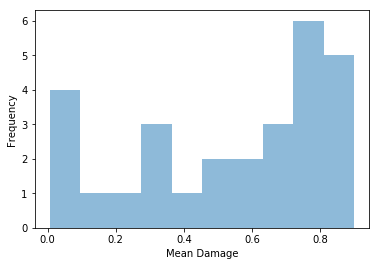

In [56]:
# Histogram of mean damages
axplot = a['meandamage'].plot.hist(alpha=0.5, x="Mean Damage")
axplot.set_xlabel("Mean Damage")
axplot

In [35]:
# joing result table with buliding inventory
join_gdf = gdf.merge(df, on='guid')

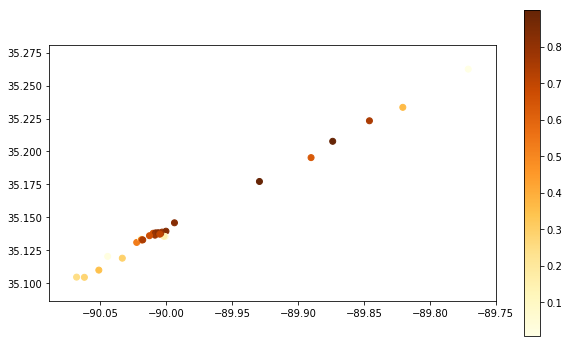

In [51]:
on_path = join_gdf.loc[join_gdf['hazardval'] != 0]
on_path.plot(figsize=(10,6), column='meandamage', cmap=cm.get_cmap("YlOrBr"), legend=True)

In [37]:
# filtered buildings with more than 80% mean damage
high_dmg = join_gdf.loc[join_gdf['meandamage'] > 0.8]

In [38]:
PlotUtil.get_geopandas_map(high_dmg)

In [65]:
risky = df.sort_values(by=['meandamage'],ascending=False).head(n=10)
risky_gdf = gdf.merge(risky, on='guid')

In [66]:
risky_gdf

,IMPUTED,a_stories,appr_bldg,b_stories,bldg_id,broad_occ,bsmt_type,cont_val,dgn_lvl,dwell_unit,...,lifesfty,collprev,insignific,moderate,heavy,complete,meandamage,mdamagedev,hazardtype,hazardval
0,F,1,989400,1,017044 00068C_1_1,Office Commercial,COMMERCIAL BSMT,3815606,Low - Code,0,...,0.998636,0.659011,1.551864e-06,1.362108e-03,0.339626,0.659011,0.780115,0.180123,wind,69.038202
1,T,2,3375000,0,017048 00026_SCH216,Education,NONE,8860365,Low - Code,0,...,0.999936,0.804647,6.315918e-07,6.343834e-05,0.195289,0.804647,0.831601,0.150069,wind,72.096150
2,T,2,3375000,0,B0156 00242_SCH550,Education,NONE,8860365,Low - Code,0,...,1.000000,0.990858,4.483258e-11,8.873938e-09,0.009142,0.990858,0.896800,0.052787,wind,86.329936
3,T,2,3375000,0,020081 00002C_UNI178,Education,NONE,13290548,Low - Code,0,...,0.999922,0.793038,7.918616e-07,7.749404e-05,0.206884,0.793038,0.827532,0.153210,wind,71.739447
4,F,2,123100,0,017031 00030_1_1,Office Commercial,NONE,978510,Low - Code,0,...,0.999611,0.740477,2.914136e-07,3.891815e-04,0.259134,0.740477,0.809013,0.165707,wind,71.852735
5,F,1,592200,0,017028 00002C_1_1,Office Commercial,NONE,2902720,Low - Code,0,...,0.998598,0.656989,1.611796e-06,1.400597e-03,0.341609,0.656989,0.779392,0.180420,wind,68.973616
6,T,2,3375000,0,053037 00005_UNI560,Education,NONE,13290548,Low - Code,0,...,1.000000,0.999282,7.549517e-14,1.728517e-11,0.000718,0.999282,0.899749,0.041157,wind,95.344963
7,F,1,138200,0,017038 00038C_1_1,Office Commercial,NONE,738202,Low - Code,0,...,0.999782,0.772271,1.368885e-07,2.180225e-04,0.227511,0.772271,0.820209,0.158543,wind,73.103704
8,F,2,166000,0,016005 00007_1_1,Office Commercial,NONE,1532960,Pre - Code,0,...,0.995934,0.572619,7.038739e-06,4.059118e-03,0.423315,0.572619,0.748810,0.190838,wind,66.427951
9,F,1,55400,0,017042 00003_1_1,Office Commercial,NONE,329570,Low - Code,0,...,0.998410,0.647738,1.913494e-06,1.588470e-03,0.350671,0.647738,0.776080,0.181749,wind,68.680660


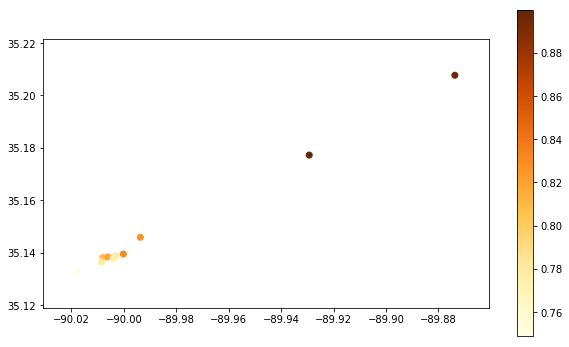

In [68]:
risky_gdf.plot(figsize=(10,6), column='meandamage', cmap=cm.get_cmap("YlOrBr"), legend=True)